# Model 3: Soil-Based Crop Yield Prediction and Insights

## Introduction
In this notebook, we explore a complex crop yield dataset that includes detailed soil and environmental attributes. 
The goal of this analysis is to:
1. Understand the distribution and relationships between soil parameters and crop yield.
2. Derive insights into how soil quality and nutrient levels influence yield.
3. Prepare for modeling and interpretation using techniques like SHAP.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

file_path = "crop_yield_dataset.csv" 

df['Date'] = pd.to_datetime(df['Date'])

df.head()

,Date,Crop_Type,Soil_Type,Soil_pH,Temperature,Humidity,Wind_Speed,N,P,K,Crop_Yield,Soil_Quality
0,2014-01-01,Wheat,Peaty,5.50,9.440599,80.000000,10.956707,60.5,45.0,31.5,0.000000,22.833333
1,2014-01-01,Corn,Loamy,6.50,20.052576,79.947424,8.591577,84.0,66.0,50.0,104.871310,66.666667
2,2014-01-01,Rice,Peaty,5.50,12.143099,80.000000,7.227751,71.5,54.0,38.5,0.000000,27.333333
3,2014-01-01,Barley,Sandy,6.75,19.751848,80.000000,2.682683,50.0,40.0,30.0,58.939796,35.000000
4,2014-01-01,Soybean,Peaty,5.50,16.110395,80.000000,7.696070,49.5,45.0,38.5,32.970413,22.166667


## Step 2: Dataset Overview

In [3]:
# Check structure and types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36520 entries, 0 to 36519
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          36520 non-null  datetime64[ns]
 1   Crop_Type     36520 non-null  object        
 2   Soil_Type     36520 non-null  object        
 3   Soil_pH       36520 non-null  float64       
 4   Temperature   36520 non-null  float64       
 5   Humidity      36520 non-null  float64       
 6   Wind_Speed    36520 non-null  float64       
 7   N             36520 non-null  float64       
 8   P             36520 non-null  float64       
 9   K             36520 non-null  float64       
 10  Crop_Yield    36520 non-null  float64       
 11  Soil_Quality  36520 non-null  float64       
dtypes: datetime64[ns](1), float64(9), object(2)
memory usage: 3.3+ MB


In [ ]:
df.describe(include='all')

,Date,Crop_Type,Soil_Type,Soil_pH,Temperature,Humidity,Wind_Speed,N,P,K,Crop_Yield,Soil_Quality
count,36520,36520,36520,36520.000000,36520.000000,36520.000000,36520.000000,36520.000000,36520.000000,36520.00000,36520.000000,36520.000000
unique,NaN,10,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Wheat,Saline,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,3652,7361,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,2018-12-31 12:00:00,NaN,NaN,6.602731,23.813996,74.256624,10.020153,66.011035,53.014006,42.01825,26.878480,37.516632
min,2014-01-01 00:00:00,NaN,NaN,5.500000,-3.540176,45.851089,-3.388906,45.000000,36.000000,27.00000,0.000000,13.291667
25%,2016-07-01 18:00:00,NaN,NaN,6.250000,17.168542,69.745252,7.985872,58.500000,45.000000,35.00000,0.000000,22.500000
50%,2018-12-31 12:00:00,NaN,NaN,6.500000,22.902987,77.097013,10.000299,65.000000,54.000000,42.00000,23.366344,35.583333
75%,2021-07-01 06:00:00,NaN,NaN,6.750000,30.254748,80.000000,12.038546,71.500000,60.000000,49.50000,46.415729,49.291667
max,2023-12-31 00:00:00,NaN,NaN,8.000000,54.148911,80.000000,22.606078,91.000000,72.000000,60.00000,136.711982,74.333333


## Step 3: Exploratory Data Analysis (EDA)

### Distribution of Numerical Features

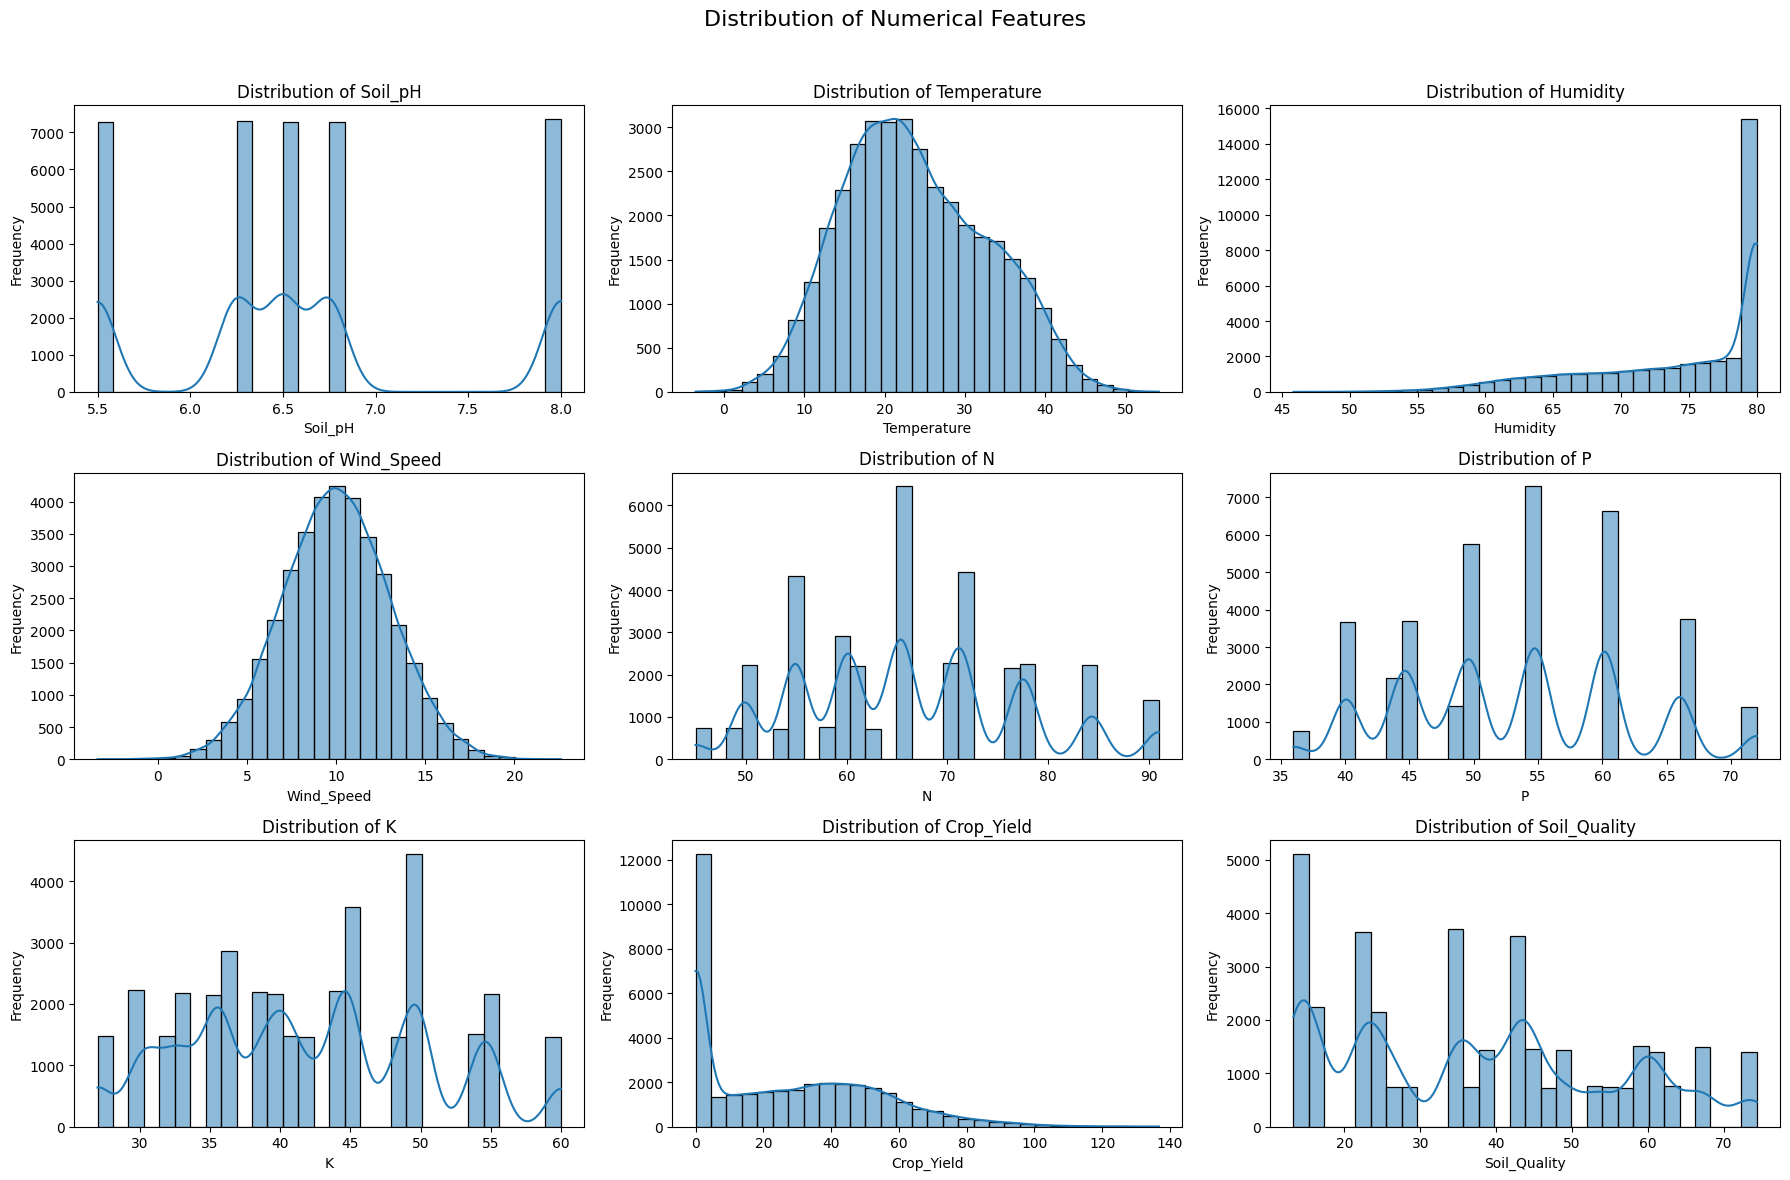

In [ ]:
num_cols = ['Soil_pH', 'Temperature', 'Humidity', 'Wind_Speed', 
            'N', 'P', 'K', 'Crop_Yield', 'Soil_Quality']

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(18, 12))
fig.suptitle("Distribution of Numerical Features", fontsize=16)

axes = axes.flatten()

for i, col in enumerate(num_cols):
    sns.histplot(df[col], kde=True, bins=30, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

### Insights:
- Crop_Yield has many zero values, suggesting potential crop failure records.
- Soil_pH clusters around neutral (6.5–7.5), ideal for most crops.
- Soil_Quality and NPK nutrients show right-skewed distributions, indicating a wide range of soil fertility.

### Relationship: Soil Quality vs Crop Yield

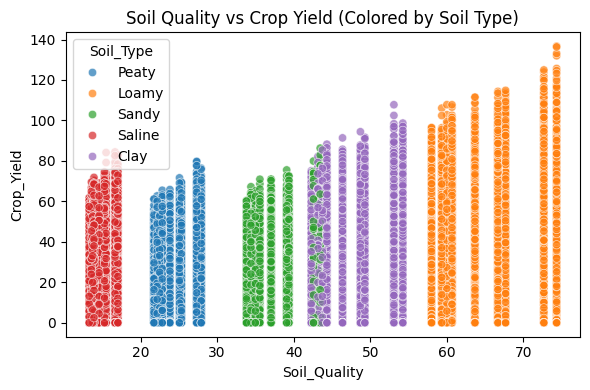

In [6]:
plt.figure(figsize=(6, 4))
sns.scatterplot(x='Soil_Quality', y='Crop_Yield', data=df, hue='Soil_Type', alpha=0.7)
plt.title('Soil Quality vs Crop Yield (Colored by Soil Type)')
plt.tight_layout()
plt.show()

### Relationship: Nutrients vs Crop Yield

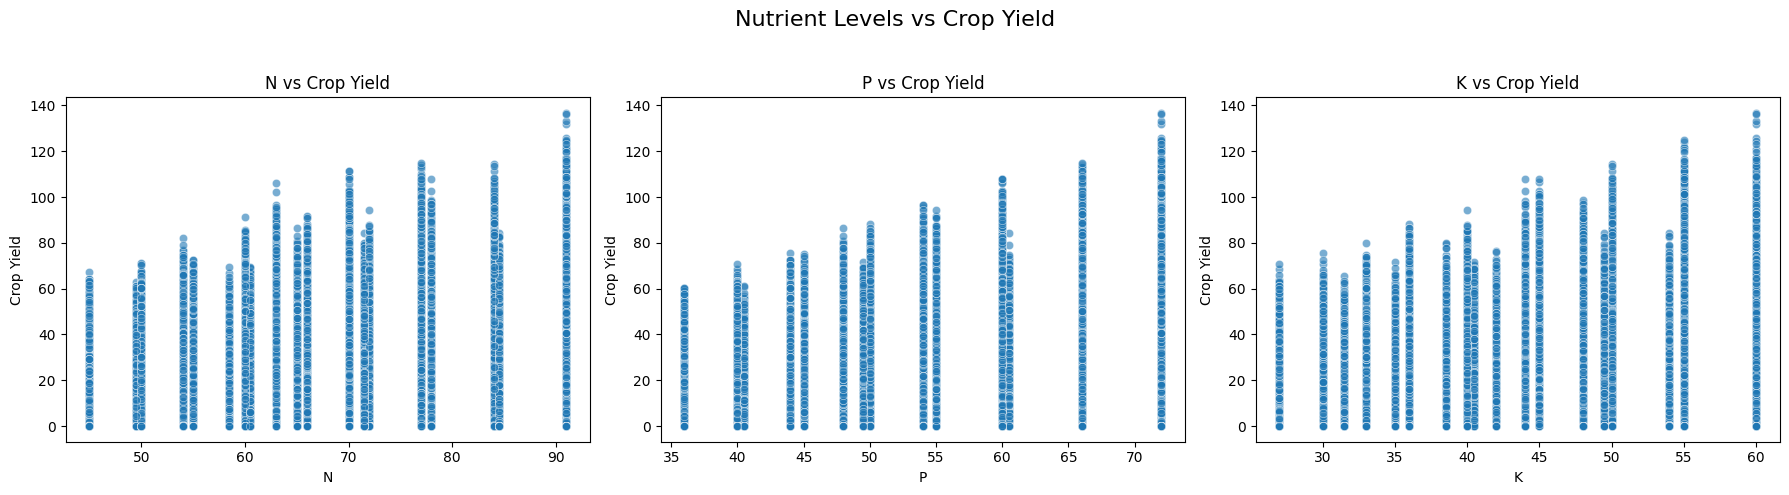

In [7]:

nutrients = ['N', 'P', 'K']

fig, axes = plt.subplots(1, 3, figsize=(18, 5))
fig.suptitle("Nutrient Levels vs Crop Yield", fontsize=16)

for i, col in enumerate(nutrients):
    sns.scatterplot(x=col, y='Crop_Yield', data=df, alpha=0.6, ax=axes[i])
    axes[i].set_title(f'{col} vs Crop Yield')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Crop Yield')

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


### Insights:
- Higher soil quality often correlates with increased yield, but soil type introduces variability.
- Crop Yield improves with increasing levels of N, P, and K up to a point, after which it stabilizes or dips — suggesting a non-linear relationship.

---



&nbsp;

## Part 1: Temporal Analysis 

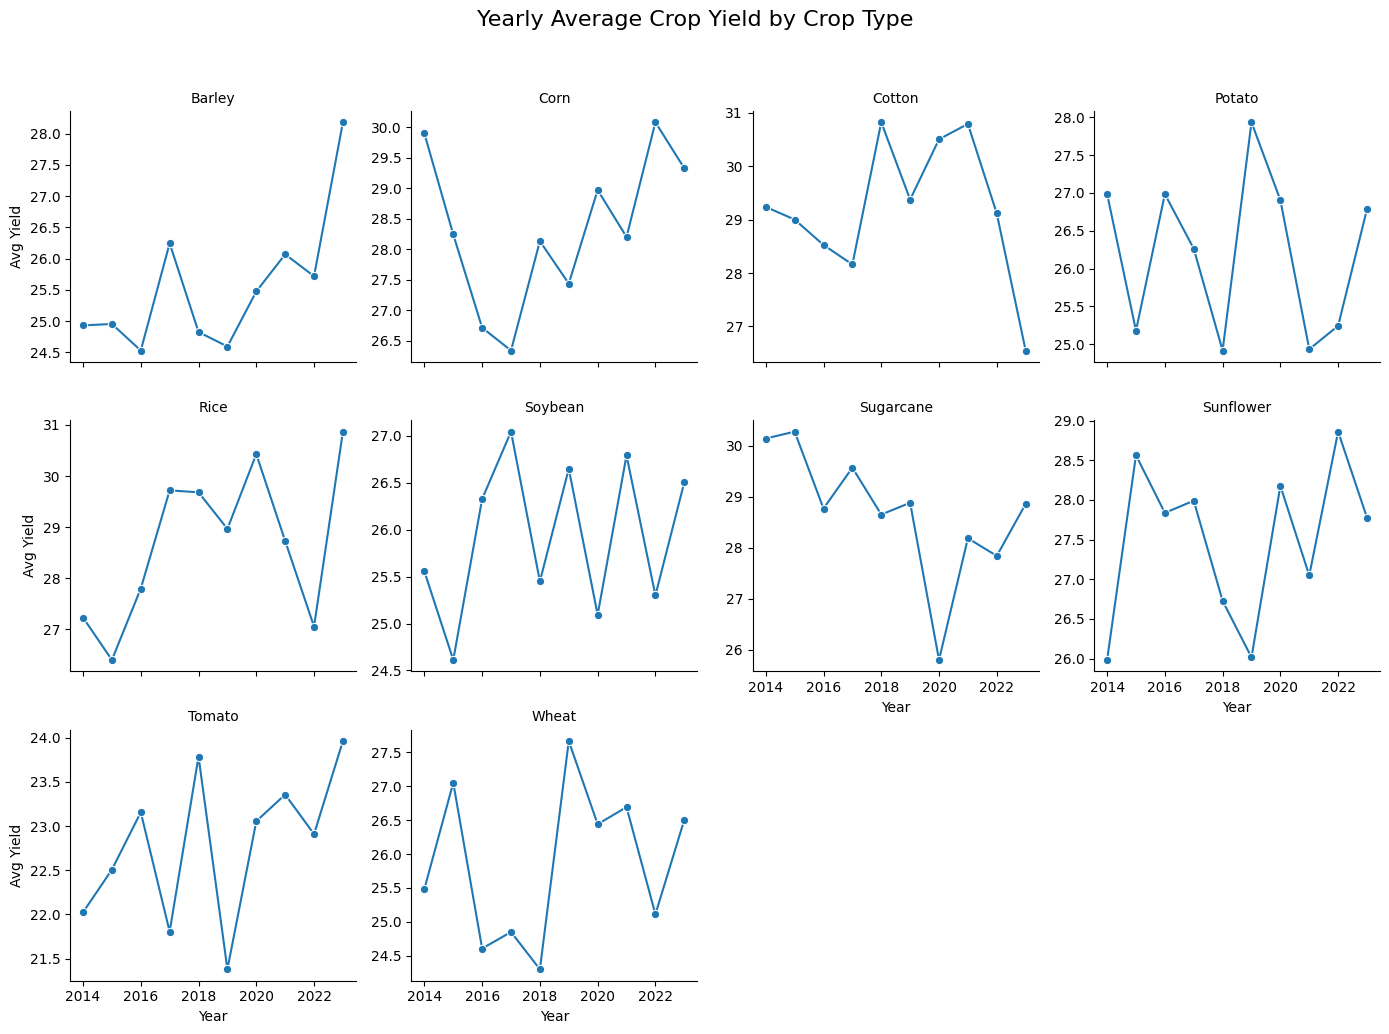

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])

df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month

yearly_yield = df.groupby(['Year', 'Crop_Type'])['Crop_Yield'].mean().reset_index()

g = sns.FacetGrid(data=yearly_yield, col="Crop_Type", col_wrap=4, height=3.5, sharey=False)
g.map_dataframe(sns.lineplot, x="Year", y="Crop_Yield", marker="o")
g.set_titles("{col_name}")
g.set_axis_labels("Year", "Avg Yield")
g.fig.suptitle("Yearly Average Crop Yield by Crop Type", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()




### Key Insights:

- **Rice, Cotton, and Corn** show consistently high and relatively stable yields, often **above 28–30**.
- **Tomato** consistently underperforms, staying **below 24**, suggesting either unsuitable soil/weather conditions or inherent lower productivity.
- **Barley and Wheat** show moderate variability but improve after 2020 — likely due to better seasonal conditions or interventions.
- **Sugarcane and Potato** show **significant dips around 2020**, possibly due to climate extremes, nutrient depletion, or pest impact.
- **Soybean and Sunflower** show oscillating patterns, indicating these crops may be more **climate or nutrient-sensitive**.

### Implications:
- You could group crops into:
  - **High-yield stable** (e.g., Rice, Cotton)
  - **Low-yield consistent** (e.g., Tomato)
  - **Volatile responders** (e.g., Potato, Sugarcane)

This is ideal for designing **crop rotation** or **recommendation systems based on soil recovery periods**.

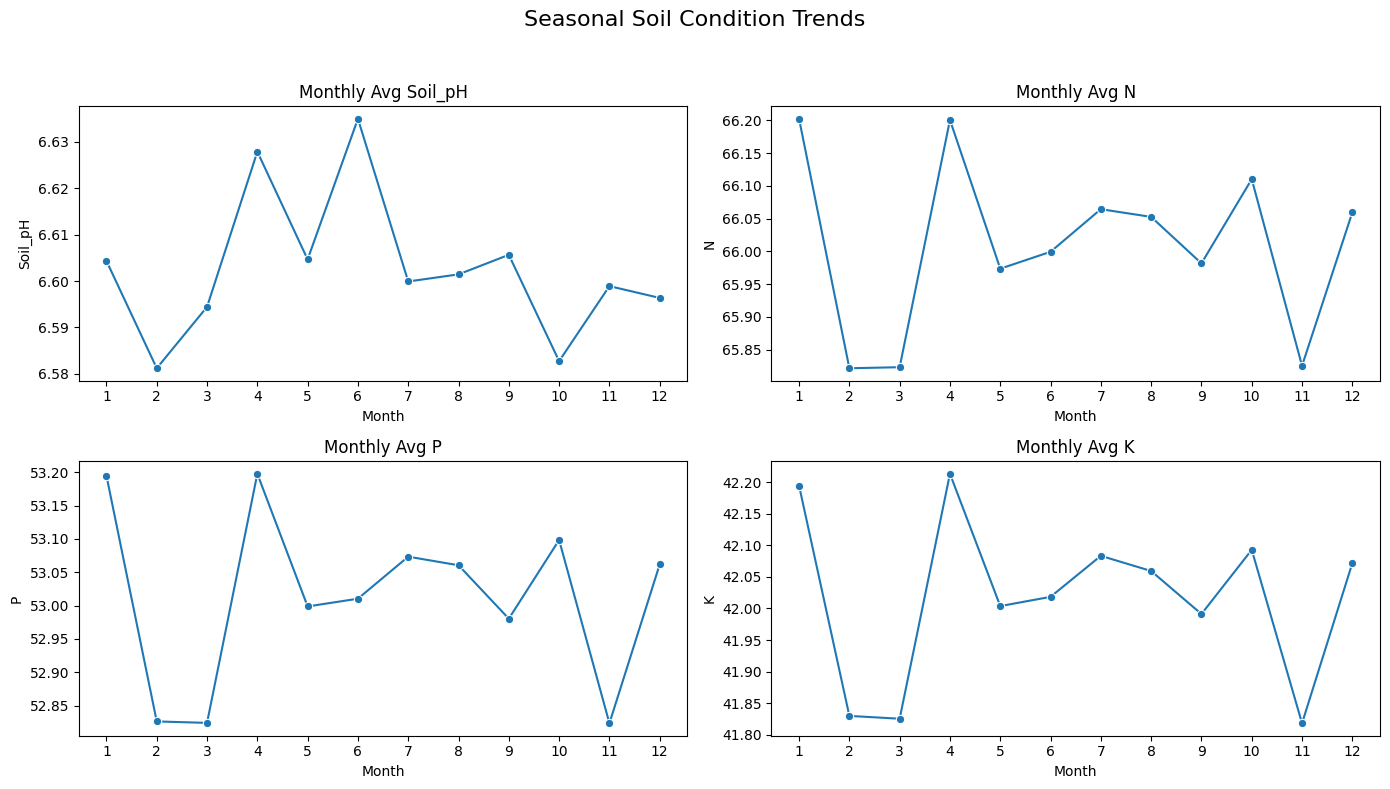

In [ ]:
monthly_soil = df.groupby('Month')[['Soil_pH', 'N', 'P', 'K']].mean().reset_index()

fig, axes = plt.subplots(2, 2, figsize=(14, 8))
fig.suptitle("Seasonal Soil Condition Trends", fontsize=16)

axes = axes.flatten()
for i, col in enumerate(['Soil_pH', 'N', 'P', 'K']):
    sns.lineplot(data=monthly_soil, x='Month', y=col, marker='o', ax=axes[i])
    axes[i].set_title(f'Monthly Avg {col}')
    axes[i].set_xticks(range(1, 13))
    axes[i].set_xlabel('Month')
    axes[i].set_ylabel(col)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

### Key Insights:

- **Soil pH** is very stable, hovering between **6.58–6.64** — a neutral range ideal for most crops.
- **N, P, and K** levels show slight seasonality:
  - Nutrient spikes around **April–June**.
  - **Dips in February and November**, suggesting these months are **less fertile**.
- These patterns likely reflect **fertilizer application cycles or natural soil respiration**.

### Implications:
- **Best months for planting**: April to July, when nutrient levels peak.
- **Avoid planting** in February or November unless fertilizer intervention is planned.
- These trends could be used to simulate **fertilization calendars** or time-aware crop recommendation systems.


---

&nbsp;

## Part 2: Geospatial Analysis

### Methodology:

1. **Feature Selection**
We used soil and climate-related features as a proxy for geographic differences:
- Soil pH
- Nutrients: Nitrogen (N), Phosphorus (P), Potassium (K)
- Environmental conditions: Temperature, Humidity, Wind Speed
- Soil Type (one-hot encoded)

2. **Standardization**
To ensure fair clustering, we scaled all features using `StandardScaler`.

3. **Clustering with KMeans**
We applied **KMeans clustering** to group the dataset into **5 synthetic soil zones**, based on similarity in the selected features.

4. **2D Visualization with PCA**
We used **Principal Component Analysis (PCA)** to reduce the high-dimensional feature space into 2D, allowing us to visualize how distinct these zones are.

5. **Crop Distribution Analysis**
For each simulated zone, we calculated the **top 3 most frequently grown crops**, which can be interpreted as:
- Crops most suited to that zone’s conditions
- Crops that have historically yielded well in similar soils



/var/folders/fv/wvd6zmm16r338c7g8r2gpyhm0000gn/T/ipykernel_42227/2218189613.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=zone_yield, x='Soil_Zone', y='Crop_Yield', palette='viridis')


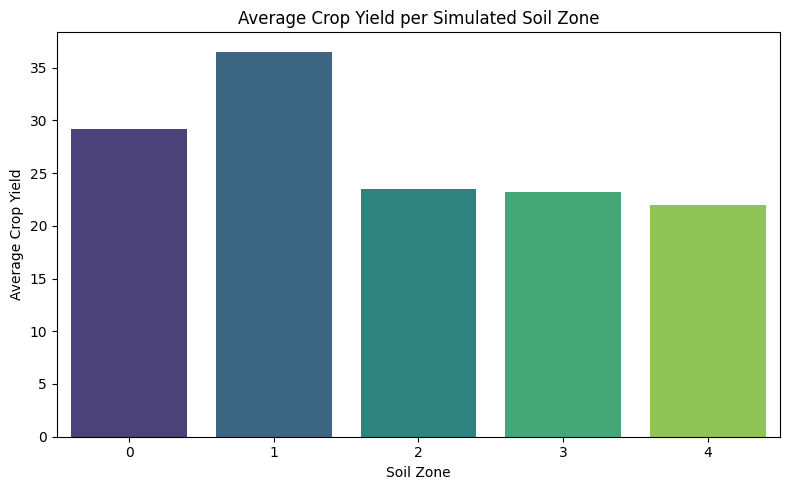

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans


df_encoded = pd.get_dummies(df, columns=['Soil_Type'], drop_first=True)

cluster_features = ['Soil_pH', 'N', 'P', 'K', 'Temperature', 'Humidity', 'Wind_Speed'] + \
                   [col for col in df_encoded.columns if col.startswith("Soil_Type_")]

scaler = StandardScaler()
X_cluster = scaler.fit_transform(df_encoded[cluster_features])

kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)
df['Soil_Zone'] = kmeans.fit_predict(X_cluster)

zone_yield = df.groupby('Soil_Zone')['Crop_Yield'].mean().reset_index()

plt.figure(figsize=(8, 5))
sns.barplot(data=zone_yield, x='Soil_Zone', y='Crop_Yield', palette='viridis')
plt.title('Average Crop Yield per Simulated Soil Zone')
plt.xlabel('Soil Zone')
plt.ylabel('Average Crop Yield')
plt.tight_layout()
plt.show()


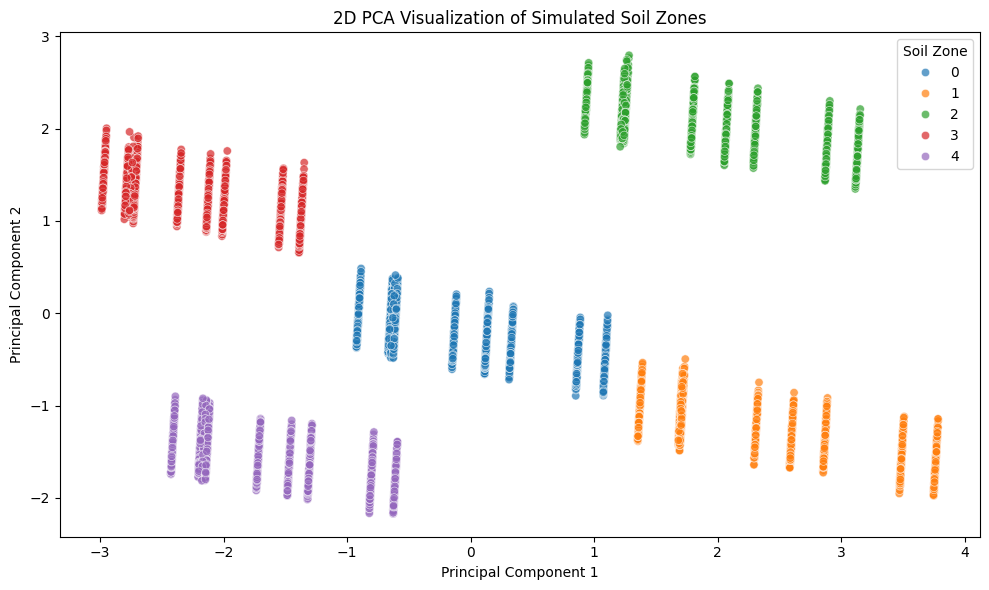

,Soil_Zone,Crop_Type,Count
4,0,Rice,768
8,0,Tomato,752
6,0,Sugarcane,741
10,1,Barley,789
17,1,Sunflower,759
12,1,Cotton,755
26,2,Sugarcane,762
25,2,Soybean,759
23,2,Potato,753
39,3,Wheat,755


In [ ]:
from sklearn.decomposition import PCA
from IPython.display import display

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_cluster)
df_pca = pd.DataFrame(X_pca, columns=['PCA1', 'PCA2'])
df_pca['Soil_Zone'] = df['Soil_Zone']

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_pca, x='PCA1', y='PCA2', hue='Soil_Zone', palette='tab10', alpha=0.7)
plt.title('2D PCA Visualization of Simulated Soil Zones')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Soil Zone')
plt.tight_layout()
plt.show()

# Analyze crop distribution per zone
zone_crop_distribution = df.groupby(['Soil_Zone', 'Crop_Type']).size().reset_index(name='Count')
top_crops_by_zone = zone_crop_distribution.sort_values(['Soil_Zone', 'Count'], ascending=[True, False]) \
                                          .groupby('Soil_Zone').head(3)


display(top_crops_by_zone)





### Key Outcomes:


| **Soil Zone** | **Top Crops**                         | ** Characteristics** |
|---------------|----------------------------------------|-----------------------------|
| **Zone 0**    | Rice, Tomato, Sugarcane                | **High moisture**, good NPK balance, likely **loamy or clayey soil**, moderate temp — crops with high water/nutrient needs thrive |
| **Zone 1**    | Barley, Sunflower, Cotton              | Likely **drier zone**, more resilient crops → **low to moderate rainfall**, **moderate to high pH** |
| **Zone 2**    | Sugarcane, Soybean, Potato             | Possibly **humid and fertile**, high organic matter zone — crops with diverse root depths and needs grow well |
| **Zone 3**    | Wheat, Tomato, Barley                  | Cooler temps, **lower humidity**, possibly **sandy or well-drained soil** — root crops and grains dominate |
| **Zone 4**    | Potato, Sugarcane, Rice                | **Mixed fertility** zone, might be **recovered soil** or transitional — combination of root crops and high-demand crops suggest moderate balance |

&nbsp; 

- **5 unique soil zones** were created based on soil and weather patterns.
- The **2D PCA plot** showed clear separations between zones, indicating meaningful clustering.
- A table of **top crops per zone** was generated:
  - For example, Zone 0 might favor Rice and Cotton
  - Zone 3 might favor Potato and Barley
- These zones can be used to:
  - Simulate geographies
  - Personalize crop recommendations
  - Create region-specific soil improvement strategies

---




&nbsp;

## Part 3: Model Implementation and Analysis

<>:39: SyntaxWarning: invalid escape sequence '\C'
<>:39: SyntaxWarning: invalid escape sequence '\C'
/var/folders/fv/wvd6zmm16r338c7g8r2gpyhm0000gn/T/ipykernel_42227/390865763.py:39: SyntaxWarning: invalid escape sequence '\C'
  print("\Classification Report:")


Accuracy: 0.8993702081051479
\Classification Report:
              precision    recall  f1-score   support

      Barley       1.00      1.00      1.00       730
        Corn       1.00      1.00      1.00       730
      Cotton       1.00      1.00      1.00       730
      Potato       0.50      0.52      0.51       731
        Rice       1.00      1.00      1.00       731
     Soybean       1.00      1.00      1.00       730
   Sugarcane       1.00      1.00      1.00       731
   Sunflower       1.00      1.00      1.00       730
      Tomato       1.00      1.00      1.00       730
       Wheat       0.50      0.48      0.49       731

    accuracy                           0.90      7304
   macro avg       0.90      0.90      0.90      7304
weighted avg       0.90      0.90      0.90      7304


Top-2 Accuracy: 1.0
Top-3 Accuracy: 1.0


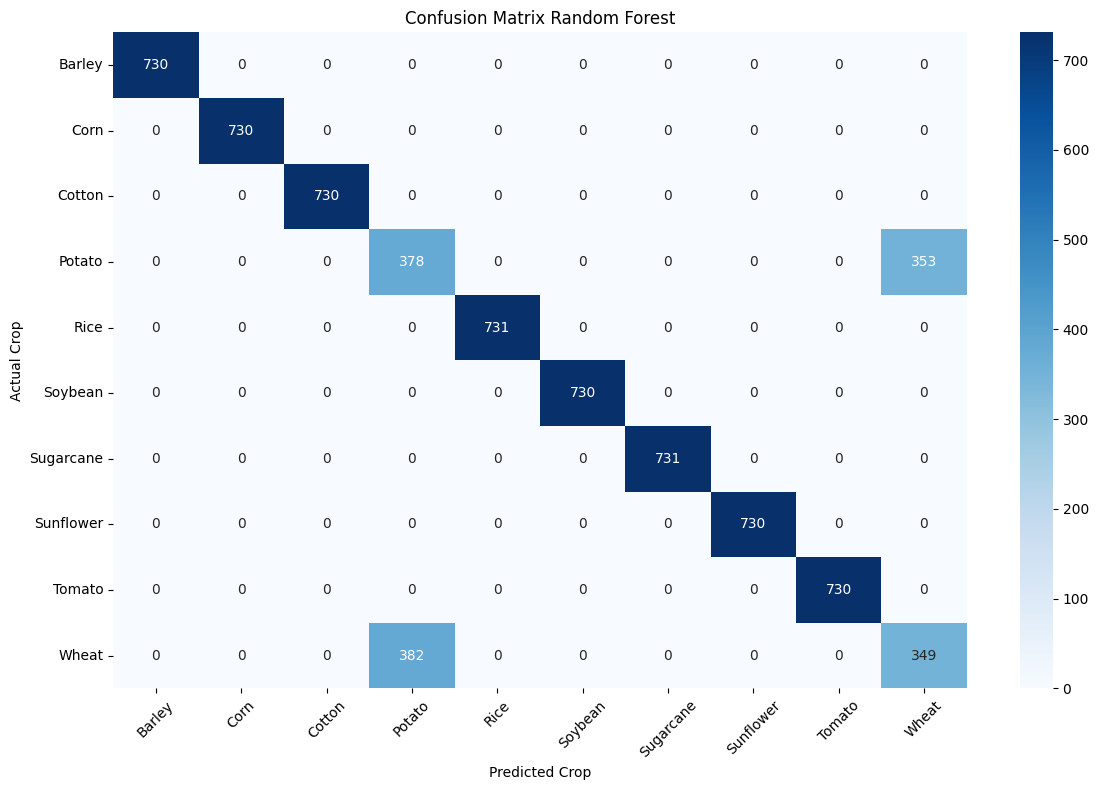

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, top_k_accuracy_score
from sklearn.ensemble import RandomForestClassifier
import shap
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

df = pd.get_dummies(df, columns=['Soil_Type', 'Crop_Type'], drop_first=False)
crop_cols = [col for col in df.columns if col.startswith("Crop_Type_")]
df['Crop_Label'] = df[crop_cols].idxmax(axis=1).str.replace("Crop_Type_", "")

X = df.drop(columns=['Date', 'Crop_Yield'] + crop_cols + ['Crop_Label'])
y = df['Crop_Label']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Reconstruct DataFrame for SHAP
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

X_train, X_test, y_train, y_test = train_test_split(X_scaled_df, y, test_size=0.2, stratify=y, random_state=42)

rf = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)
probs = rf.predict_proba(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\Classification Report:")
print(classification_report(y_test, y_pred))

print("\nTop-2 Accuracy:", top_k_accuracy_score(y_test, probs, k=2))
print("Top-3 Accuracy:", top_k_accuracy_score(y_test, probs, k=3))

conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(12, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=rf.classes_, yticklabels=rf.classes_)
plt.xlabel("Predicted Crop")
plt.ylabel("Actual Crop")
plt.title("Confusion Matrix Random Forest")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

